### INSTRUCTIONS:  
Create a logistics regression model to predict the class label from the first eight attributes of the question set.
Try doing the same using two different subsets (your choice) of those eight attributes.
Report the accuracies of each of these three models.
For the two subsets that you use, provide some justification (why you chose those features in a given subset).

In [113]:
import pandas as pd   #import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem 1
An automated answer-rating site marks each post in a community forum website as “good” or “bad” based on the quality of the post. 
- Create a logistics regression model to predict the class label from the first eight attributes of the question set.
- Try doing the same using two different subsets (your choice) of those eight attributes.
- Report the accuracies of each of these three models.
- For the two subsets that you use, provide some justification (why you chose those features in a given subset).

In [114]:
quality = pd.read_csv('/Users/jennyskytta/Downloads/Datafiles/quality.csv') # load in quality csv
quality.sample(5) # outcome is B or G on variable "label"

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
18,505,9,25,0,0,0,0,1,2,G
17,504,25,124,4,0,1,0,4,6,G
12,13,9,56,5,0,0,0,2,1,B
26,513,10,35,0,0,1,0,1,0,G
15,502,4,17,2,0,1,1,1,0,G


In [115]:
yQ = quality.label.values #assign my outcome vector 
XQ = quality[["num_words", "num_characters", "num_misspelled", "bin_end_qmark", "num_interrogative", "bin_start_small", "num_sentences", "num_punctuations"]].values

In [116]:
from sklearn.model_selection import train_test_split  # import our library 
from sklearn.linear_model import LogisticRegression 
XQtrain, XQtest, yQtrain, yQtest = train_test_split(XQ, yQ, test_size = 0.25, random_state=58)
m = LogisticRegression(max_iter=1000)
m.fit(XQtrain,yQtrain)  # train the model

LogisticRegression(max_iter=1000)

In [117]:
from sklearn.metrics import classification_report
predictions = m.predict(XQtest) # lets start our predictions
print(classification_report(yQtest,predictions))

              precision    recall  f1-score   support

           B       0.67      0.67      0.67         3
           G       0.75      0.75      0.75         4

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



##### Subset 2 of Quality data
I selected number of words, number of mispellings, number of sentences and number of punctuations solely because they intuitively appear to be hallmarks of quality writing.  One would assume that you're going to convey a better message with more succinct words that are spelled correctly, with proper grammar and punctuation.  These appear to be better predictors than the combined 8 variables as they predict with 100% accuracy.

In [118]:
yQ2 = quality.label.values #assign my outcome vector 
XQ2 = quality[["num_words", "num_misspelled", "num_sentences", "num_punctuations"]].values
XQ2train, XQ2test, yQ2train, yQ2test = train_test_split(XQ2, yQ2, test_size = 0.25, random_state=58)
m = LogisticRegression(max_iter=1000)
m.fit(XQ2train,yQ2train)  # train the model

LogisticRegression(max_iter=1000)

In [119]:
predictions2 = m.predict(XQ2test) # lets start our predictions
print(classification_report(yQ2test,predictions2))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00         3
           G       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



##### Subset 3 of Quality data
For good measure, I 3 of the remaining variables to assess if they might have stronger influence that my intuition expected.  As we see, they are poorer predictors of quality than the previous subset, as this model has roughly 57% accuracy.

In [120]:
yQ3 = quality.label.values #assign my outcome vector 
XQ3 = quality[["bin_end_qmark", "num_interrogative", "bin_start_small"]].values
XQ3train, XQ3test, yQ3train, yQ3test = train_test_split(XQ3, yQ3, test_size = 0.25, random_state=58)
m = LogisticRegression(max_iter=1000)
m.fit(XQ3train,yQ3train)  # train the model
predictions3 = m.predict(XQ3test) # lets start our predictions
print(m.score(XQ3,yQ3))
print(classification_report(yQ3test,predictions3))

0.5714285714285714
              precision    recall  f1-score   support

           B       0.00      0.00      0.00         3
           G       0.50      0.75      0.60         4

    accuracy                           0.43         7
   macro avg       0.25      0.38      0.30         7
weighted avg       0.29      0.43      0.34         7



### Problem 2
Using a “wine” dataset, containing information about several wines, their characteristics, and their quality, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality. Report these features.
- Download wine dataset. It contains information about several wines—their characteristics (features) and if it's considered high quality or not (1 or 0).
- First, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality (last column). Report these features.

In [121]:
wine = pd.read_csv('/Users/jennyskytta/Downloads/Datafiles/wine.csv') # load in wine csv
print(wine.shape)  # look at shape
print(wine.high_quality.value_counts())  # value counts of high quality
wine.sample(5) # view the dataframe /explore the data

(6497, 15)
0.0    5220
1.0    1277
Name: high_quality, dtype: int64


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
4392,6.5,0.37,0.30,2.2,0.033,39.0,107.0,0.98894,3.22,0.53,13.5,7,white,0.0,1.0
4324,6.9,0.23,0.32,16.4,0.045,62.0,153.0,0.99720,3.22,0.42,10.5,5,white,0.0,0.0
1507,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6,red,1.0,0.0
4882,6.6,0.20,0.14,4.4,0.184,35.0,168.0,0.99396,2.93,0.45,9.4,6,white,0.0,0.0
760,9.0,0.58,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5,red,1.0,0.0


In [122]:
scores = wine[["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]]

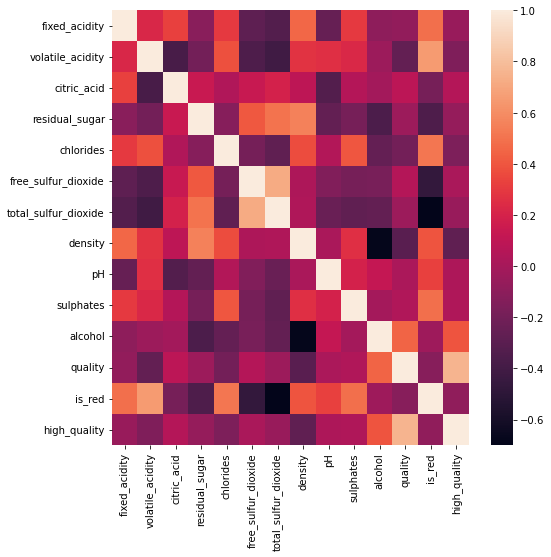

In [123]:
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(8,8))
seaborn.heatmap(wine.corr(), ax=ax)
plt.show()

In [124]:
y = wine.high_quality.values #assign my outcome vector 
#assign predictive variables - chosen based on high variability in range of values 
X = wine[["density","alcohol", "is_red"]].values

In [125]:
model = m.fit(X,y)
m.score(X,y)# calculate accuracy  - % of correct predictions 
# this shows that the mean is 91% accurate 

0.8119131907034016

In [126]:
#testing new predictor variables - chosen based on high variability in range of values 
X2 = wine[["density", "pH", "sulphates"]].values
m.fit(X2,y)
m.predict(X2)
m.score(X2,y)  # still 91% accuracy for predicting high quality 

0.8034477451131291

In [127]:
#assign my outcome vector 
y3 = wine.high_quality.values
#assign predictive variables - chosen based on high variability in range of values 
X3 = wine[["density"]].values
m.fit(X3,y)
m.predict(X3)
m.score(X3,y)  # still 82% accuracy for predicting high quality 

0.8034477451131291

In [128]:
y4 = wine.high_quality.values
#assign predictive variables - chosen based on high variability in range of values 
X4 = wine[["alcohol"]].values
m.fit(X4,y)
m.predict(X4)
m.score(X4,y)  # 79% maintained with 1 variable

0.8131445282438048

#### Testing Variables Results
I tried 4 model combinations of the predictor variables and for the most part, results showed within the 80% predictive accuracy which isn't bad.  There were 3 however that when together showed 85% accuracy and those were is_red, alcohol and density.  

### kNN test with 70% ranging 2-10
- Then, use 70% data for training to build a kNN classifier with different values of k ranging from 2–10.
- Plot your accuracies with each of these. In other words, your final result will be a line chart with k on the x-axis and accuracy on the y-axis. 

In [129]:
from sklearn.neighbors import KNeighborsClassifier 

m = KNeighborsClassifier(2)  # testing on model 1 parameters to compare
m.fit(X,y)  # fit is the same thing as "train"  - we used everything for training so everything is trained 
m.score(X,y)

0.9119593658611667

In [130]:
from sklearn.model_selection import train_test_split    # Predictor variables: density, alcohol, is_red
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state=58) # 70 / 30 split
m = KNeighborsClassifier(7)
m.fit(Xtrain, ytrain) # fit model with training data
print(m.score(Xtest, ytest)) # validating 

0.8005128205128205


In [131]:
X2train, X2test, y2train, y2test = train_test_split(X, y, test_size = 0.30, random_state=101) # 70 / 30 split
m = KNeighborsClassifier(10)
m.fit(X2train, y2train) # fit model with testing data
print(m.score(X2test, y2test)) # validating 

0.8097435897435897


In [132]:
X3train, X3test, y3train, y3test = train_test_split(X, y, test_size = 0.30, random_state=99) # 70 / 30 split
m = KNeighborsClassifier(2)
m.fit(X3train, y3train) # fit model with testing data
print(m.score(X3test, y3test)) # validating 

0.8297435897435897


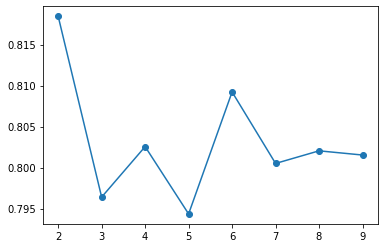

In [133]:
accuracies = []
for k in range(2,10):
    m = KNeighborsClassifier(k)
    m.fit(Xtrain, ytrain)
    accuracies.append(m.score(Xtest, ytest))

_ = plt.plot(range(2,10), accuracies, marker="o")

#### Testing on alcohol variable alone

In [134]:
# Predictor variables: "alcohol"
Xtrain, Xtest, ytrain, ytest = train_test_split(X4, y4, test_size = 0.30, random_state=99) # 70 / 30 split
m = KNeighborsClassifier(7) 
m.fit(Xtrain, ytrain) # fit model with testing data
print(m.score(Xtest, ytest)) # validating 

0.778974358974359


In [135]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X4, y4, test_size = 0.30, random_state=45) # 70 / 30 split
m = KNeighborsClassifier(10)
m.fit(Xtrain, ytrain) # fit model with testing data
print(m.score(Xtest, ytest)) # validating 

0.7994871794871795


In [136]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X4, y4, test_size = 0.30, random_state=5) # 70 / 30 split
m = KNeighborsClassifier(2)
m.fit(Xtrain, ytrain) # fit model with testing data
print(m.score(Xtest, ytest)) # validating 

0.7938461538461539


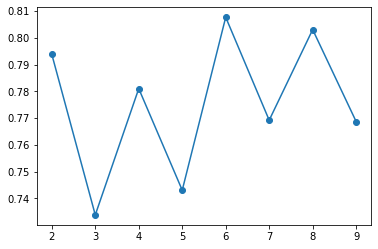

In [137]:
accuracies = []
for k in range(2,10):
    m = KNeighborsClassifier(k)
    m.fit(Xtrain, ytrain)
    accuracies.append(m.score(Xtest, ytest))

_ = plt.plot(range(2,10), accuracies, marker="o")